# Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

[We've provided you with some commentary to guide your thinking as you complete this project. However, make sure to remove all the bracketed comments before submitting your project.]

[Before you dive into analyzing your data, explain for yourself the purpose of the project and actions you plan to take.]

[Please bear in mind that studying, amending, and analyzing data is an iterative process. It is normal to return to previous steps and correct/expand them to allow for further steps.]

## Initialization

The purpose of this project is to analyze the usage patterns of customers on Megaline's Surf and Ultimate prepaid plans and determine which plan brings in more revenue. The commercial department wants to know which plan generates more revenue so that they can adjust the advertising budget accordingly.

To determine which prepaid plan brings in more revenue for Megaline, we would need to analyze the usage patterns of customers on both plans and compare the revenue generated by each plan. Based on the plan descriptions provided, the Ultimate plan offers more minutes, text messages, and data than the Surf plan, but it also comes with a higher monthly charge.

In order to determine which plan is better in terms of revenue, we need to consider not only the usage patterns of customers but also the pricing structure for each plan. The Surf plan charges customers for each minute, text message, and gigabyte of data used beyond the included amount, while the Ultimate plan charges lower rates for each unit of usage beyond the included amount.

Therefore, to determine which plan is better, we need to analyze the usage patterns of customers on each plan and calculate the total revenue generated by each plan. We can then compare the revenue generated by each plan and determine which plan brings in more revenue.

It is also important to note that the analysis should be done on a larger sample size of customers to get more accurate results. A sample size of 500 customers may not be representative of the entire customer base.

In [1]:
# Loading all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import ttest_ind

## Load data

In [2]:
# Load the data files into different DataFrames
calls = pd.read_csv('megaline_calls.csv', delimiter=',')
internet = pd.read_csv('megaline_internet.csv', delimiter=',')
messages = pd.read_csv('megaline_messages.csv', delimiter=',')
plans = pd.read_csv('megaline_plans.csv', delimiter=',')
users = pd.read_csv('megaline_users.csv', delimiter=',')


## Prepare the data

[The data for this project is split into several tables. Explore each one to get an initial understanding of the data. Do necessary corrections to each table if necessary.]

## Plans

In [3]:
# Print the general/summary information about the plans' DataFrame
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
plans.describe()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


From this information, we can infer that the Ultimate plan is more expensive than the Surf plan, as it has a higher usd_monthly_pay value. Additionally, we can see that the plans have different allowances for messages, data, and minutes, which will affect how much revenue Megaline generates from each plan. Finally, we can see that there is a difference in the cost of additional data usage between the two plans, with the Surf plan charging $10 per extra GB and the Ultimate plan charging $7 per extra GB.

In [5]:
# Print a sample of data for plans
plans.head(10)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

The plans DataFrame contains information about the two prepaid plans offered by Megaline, including the number of text messages, megabytes of data, and minutes included in each plan, as well as the monthly charge and additional fees for each unit of usage beyond the included amount. The DataFrame has 2 rows and 8 columns, and that there are no missing values. We can also see the data type of each column, which will be helpful for data preprocessing and analysis.  

## Fix data

[Fix obvious issues with the data given the initial observations.]

## Enrich data

[Add additional factors to the data if you believe they might be useful.]

## Users

In [6]:
# Print the general/summary information about the users' DataFrame
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


We may need to convert the reg_date and churn_date columns from strings to datetime objects to make it easier to work with the dates.

In [7]:
# Describe the users' DataFrame
users.describe()

,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


We can see that the DataFrame contains 500 unique users. The user_id column ranges from 1000 to 1499, which suggests that there may be other users outside of this range not included in the dataset.

The age column ranges from 18 to 75, with a mean of 45.49 and a standard deviation of 16.97. The median (50%) age is 46, which indicates that the distribution of ages is roughly symmetrical.

In [8]:
# Print a sample of data for users
users.head(10)


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

Each row represents a unique user, identified by a user_id.
The first_name and last_name columns contain the user's name.
The age column contains the user's age.
The city column contains the user's city of residence.
The reg_date column contains the date the user subscribed to Megaline's service.
The plan column contains the name of the calling plan the user is subscribed to.
The churn_date column contains the date the user stopped using Megaline's service, if applicable. 

The reg_date and churn_date columns are currently stored as strings, but they should be converted to the datetime format to make them easier to work with.
There are 34 missing values in the churn_date column. We will need to investigate whether these missing values represent active users or if they are truly missing data.
The city column contains information on the user's city of residence, but it is in a combined format that includes the metropolitan area, state abbreviation, and other information. 

### Fix Data

[Fix obvious issues with the data given the initial observations.]

In [9]:
#Convert reg_date and churn_date columns to datetime format
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')

We use pandas' to_datetime() function to convert the reg_date and churn_date columns to the datetime format

### Enrich Data

[Add additional factors to the data if you believe they might be useful.]

In [10]:
#Investigate the missing values in the churn_date column to determine if they represent active users or truly missing data and create is_active column
users['is_active'] = users['churn_date'].isna()

users.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,is_active
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,True
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,True
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,True
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,True
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,True
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaT,True
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,False
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaT,True
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaT,True
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaT,True


Missing values in the churn_date column indicate that the user is still active, and therefore we can use the absence of a value in this column as an indicator of active users. If churn_date is not null, it means the user has churned and is therefore inactive. Otherwise, the user is still active. 

The resulting users dataframe will have the reg_date and churn_date columns in the datetime format, and a new is_active column indicating whether the user is currently active or has churned.

## Calls

In [11]:
# Print the general/summary information about the calls' DataFrame
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


The calls DataFrame has 137735 entries and 4 columns. It appears that there are no missing values in the dataset as all columns have 137735 non-null values. The id column appears to contain strings, the user_id column has integer values, and both the call_date and duration columns have object dtype. The duration column should be converted to integer dtype, and the call_date column should be converted to datetime dtype for ease of analysis.

In [12]:
# Describe the calls' DataFrame
calls.describe()

,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


It looks like the duration column in the calls dataframe has a minimum value of 0. This might indicate missed or dropped calls

In [13]:
# Print a sample of data for calls
calls.head(10)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

There don't seem to be any obvious issues with the calls data at first glance. We can continue with the next step of preparing the data. 

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [14]:
# Convert call_date column to datetime dtype
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

### Enrich data

[Add additional factors to the data if you believe they might be useful.]

In [15]:
# Convert duration column to integer dtype
calls['duration'] = calls['duration'].astype('int')

In [16]:
# Round up call durations to nearest minute
calls['duration'] = calls['duration'].apply(lambda x: math.ceil(x))

This modifies the values in the duration column, so that each call duration is now rounded up to the nearest minute.

## Messages

In [17]:
# Print the general/summary information about the messages' DataFrame
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


The messages DataFrame has 76051 entries and 3 columns. It appears that there are no missing values in the dataset as all columns have 76051 non-null values. The id column appears to contain strings, the user_id column has integer values, and the message_date column has object dtype. Similar to the calls DataFrame, the message_date column should be converted to datetime dtype for ease of analysis.

In [18]:
# Describe the messages' DataFrame
messages.describe()

,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


It looks like the describe() function only provides summary statistics for columns with numerical data. In the case of the messages DataFrame, the only numerical column is user_id, so that's the only column for which summary statistics are displayed.

In [19]:
# Print a sample of data for messages
messages.head(10)

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

It appears that the messages DataFrame has 76051 entries and 3 columns. Like the calls DataFrame, there are no missing values in the dataset as all columns have 76051 non-null values. The id column appears to contain strings, the user_id column has integer values, and the message_date column has object dtype. The message_date column should be converted to datetime dtype for ease of analysis.

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [20]:
#convert message_date column to datetime dtype
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

### Enrich data

[Add additional factors to the data if you believe they might be useful.]

## Internet

In [21]:
# Print the general/summary information about the internet DataFrame
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


It appears that the internet DataFrame has 104825 entries and 4 columns. There are no missing values in the dataset as all columns have 104825 non-null values. The id column appears to contain strings, the user_id column has integer values, and both the session_date and mb_used columns have object dtype. The session_date column should be converted to datetime dtype for ease of analysis. The mb_used column in the internet table should not be rounded up to an integer value for each session, as it is for calls. Instead, it should be used to calculate the total data used by each user for the month and rounded up to gigabytes.

In [22]:
# Describe the internet DataFrame
internet.describe()

,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


It seems that there are no obvious issues with the internet dataset, similar to the messages and calls datasets. The session_date column should be converted to datetime dtype.

Note: Megaline rounds up the total for the month, and megabytes to gigabytes. If someone uses 1025 megabytes this month, they will be charged for 2 gigabytes. 

In [23]:
# Print a sample of data for the internet traffic
internet.head(10)

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [24]:
# Convert session_date column to datetime dtype
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

### Enrich data

[Add additional factors to the data if you believe they might be useful.]

## Study plan conditions

[It is critical to understand how the plans work, how users are charged based on their plan subscription. So, we suggest printing out the plan information to view their conditions once again.]

In [25]:
# Print out the plan conditions and make sure they are clear for you
plans.head(10)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Based on the plans table, there are two plans available to Megaline users: "Surf" and "Ultimate". The "Surf" plan includes 50 text messages, 500 minutes of calls, and 15 GB of data per month, with a monthly fee of 20 USD. Any additional messages beyond the included 50 cost 0.03 USD per message, and any additional minutes beyond the included 500 cost 0.03 USD per minute. Any additional data beyond the included 15 GB costs 10 USD per GB.

The "Ultimate" plan includes 1000 text messages, 3000 minutes of calls, and 30 GB of data per month, with a monthly fee of 70 USD. Any additional messages beyond the included 1000 cost 0.01 USD per message, and any additional minutes beyond the included 3000 cost 0.01 USD per minute. Any additional data beyond the included 30 GB costs 7 USD per GB.

## Aggregate data per user

[Now, as the data is clean, aggregate data per user per period in order to have just one record per user per period. It should ease the further analysis a lot.]

In [26]:
# Calculate the number of calls made by each user per month. Save the result.
# Add a new column with the month of each call
calls['month'] = pd.to_datetime(calls['call_date']).dt.to_period('M')

# Group the calls by user_id and month, and count the number of records in each group
calls_per_month = calls.groupby(['user_id', 'month']).size().reset_index(name='calls_made')

# Print the first 10 rows of the calls_per_month DataFrame
print(calls_per_month.head(10))

   user_id    month  calls_made
0     1000  2018-12          16
1     1001  2018-08          27
2     1001  2018-09          49
3     1001  2018-10          65
4     1001  2018-11          64
5     1001  2018-12          56
6     1002  2018-10          11
7     1002  2018-11          55
8     1002  2018-12          47
9     1003  2018-12         149


In [27]:
# Calculate the amount of minutes spent by each user per month. Save the result.
minutes_per_month = calls.groupby(['user_id', 'month'])['duration'].agg('sum').reset_index(name='total_minutes')

# Print the first 10 rows of the minutes_per_month DataFrame
print(minutes_per_month.head(10))

   user_id    month  total_minutes
0     1000  2018-12            108
1     1001  2018-08            160
2     1001  2018-09            278
3     1001  2018-10            348
4     1001  2018-11            379
5     1001  2018-12            368
6     1002  2018-10             51
7     1002  2018-11            338
8     1002  2018-12            346
9     1003  2018-12            987


In [28]:
# Calculate the number of messages sent by each user per month. Save the result.
# Add a new column with the month of each message
messages['month'] = pd.to_datetime(messages['message_date']).dt.to_period('M')

# Calculate the number of messages sent by each user per month
messages_per_month = messages.groupby(['user_id', 'month']).size().reset_index(name='messages_sent')

# Print the first 10 rows of the messages_per_month DataFrame
print(messages_per_month.head(10))

   user_id    month  messages_sent
0     1000  2018-12             11
1     1001  2018-08             30
2     1001  2018-09             44
3     1001  2018-10             53
4     1001  2018-11             36
5     1001  2018-12             44
6     1002  2018-10             15
7     1002  2018-11             32
8     1002  2018-12             41
9     1003  2018-12             50


In [29]:
# Calculate the volume of internet traffic used by each user per month. Save the result.
# Add a new column with the month of each internet session
internet['month'] = pd.to_datetime(internet['session_date']).dt.to_period('M')

# Group the internet sessions by user_id and month, and sum up the mb_used column for each group
internet_traffic = internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index()

# Round up the total traffic for each month to the nearest gigabyte
internet_traffic['gb_used'] = np.ceil(internet_traffic['mb_used'] / 1024)

# Rename the columns
internet_traffic = internet_traffic.rename(columns={'user_id': 'user_id', 'month': 'month', 'mb_used': 'mb_used_per_month', 'gb_used': 'gb_used_per_month'})

# Print the first 10 rows of the internet_traffic DataFrame
print(internet_traffic.head(10))


   user_id    month  mb_used_per_month  gb_used_per_month
0     1000  2018-12            1901.47                2.0
1     1001  2018-08            6919.15                7.0
2     1001  2018-09           13314.82               14.0
3     1001  2018-10           22330.49               22.0
4     1001  2018-11           18504.30               19.0
5     1001  2018-12           19369.18               19.0
6     1002  2018-10            6552.01                7.0
7     1002  2018-11           19345.08               19.0
8     1002  2018-12           14396.24               15.0
9     1003  2018-12           27044.14               27.0


[Put the aggregate data together into one DataFrame so that one record in it would represent what an unique user consumed in a given month.]

In [30]:
# Merge the data for calls, minutes, messages, internet based on user_id and month
# Merge calls_per_month and minutes_per_month on user_id and month
users_data = calls_per_month.merge(minutes_per_month, on=['user_id', 'month'], how='outer')

# Merge df with messages_per_month on user_id and month
users_data = users_data.merge(messages_per_month, on=['user_id', 'month'], how='outer')

# Merge df with internet_traffic on user_id and month
users_data = users_data.merge(internet_traffic, on=['user_id', 'month'], how='outer')

# Print the first 10 rows of the users_data DataFrame
print(users_data.head(10))



   user_id    month  calls_made  total_minutes  messages_sent  \
0     1000  2018-12        16.0          108.0           11.0   
1     1001  2018-08        27.0          160.0           30.0   
2     1001  2018-09        49.0          278.0           44.0   
3     1001  2018-10        65.0          348.0           53.0   
4     1001  2018-11        64.0          379.0           36.0   
5     1001  2018-12        56.0          368.0           44.0   
6     1002  2018-10        11.0           51.0           15.0   
7     1002  2018-11        55.0          338.0           32.0   
8     1002  2018-12        47.0          346.0           41.0   
9     1003  2018-12       149.0          987.0           50.0   

   mb_used_per_month  gb_used_per_month  
0            1901.47                2.0  
1            6919.15                7.0  
2           13314.82               14.0  
3           22330.49               22.0  
4           18504.30               19.0  
5           19369.18            

In [31]:
# Add the plan information to users_data
users_data = users_data.merge(users[['user_id', 'plan']], on='user_id', how='left')
users_data = users_data.merge(plans, left_on='plan', right_on='plan_name', how='left').drop('plan_name', axis=1)

#print the first 10 rows of the users_data DataFrame
users_data.head()

#check missing data in the users_data DataFrame
users_data.isna().sum()

#replace missing values in the users_data DataFrame with 0
users_data = users_data.fillna(0)

[Calculate the monthly revenue from each user (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan). N.B. This might not be as trivial as just a couple of lines given the plan conditions! So, it's okay to spend some time on it.]

In [32]:
# Calculate the monthly revenue for each user
# Define a function to calculate monthly revenue from each user
def calculate_monthly_revenue(row):
    minutes_used = row['total_minutes'] - row['minutes_included']
    messages_used = row['messages_sent'] - row['messages_included']
    gb_used = math.ceil(row['gb_used_per_month'])
    gb_included = row['mb_per_month_included'] / 1024
    gb_extra = gb_used - gb_included
    if gb_extra <= 0:
        gb_extra = 0
    monthly_revenue = row['usd_monthly_pay'] + \
                      row['usd_per_minute'] * max(0, minutes_used) + \
                      row['usd_per_message'] * max(0, messages_used) + \
                      row['usd_per_gb'] * gb_extra
    return monthly_revenue

# Apply the function to each row in the users_data DataFrame to calculate monthly revenue
users_data['monthly_revenue'] = users_data.apply(calculate_monthly_revenue, axis=1)

# Print the first 10 rows of the updated DataFrame
print(users_data.head(10))

   user_id    month  calls_made  total_minutes  messages_sent  \
0     1000  2018-12        16.0          108.0           11.0   
1     1001  2018-08        27.0          160.0           30.0   
2     1001  2018-09        49.0          278.0           44.0   
3     1001  2018-10        65.0          348.0           53.0   
4     1001  2018-11        64.0          379.0           36.0   
5     1001  2018-12        56.0          368.0           44.0   
6     1002  2018-10        11.0           51.0           15.0   
7     1002  2018-11        55.0          338.0           32.0   
8     1002  2018-12        47.0          346.0           41.0   
9     1003  2018-12       149.0          987.0           50.0   

   mb_used_per_month  gb_used_per_month      plan  messages_included  \
0            1901.47                2.0  ultimate               1000   
1            6919.15                7.0      surf                 50   
2           13314.82               14.0      surf                 50

## Study user behaviour

[Calculate some useful descriptive statistics for the aggregated and merged data, which typically reveal an overall picture captured by the data. Draw useful plots to help the understanding. Given that the main task is to compare the plans and decide on which one is more profitable, the statistics and the plots should be calculated on a per-plan basis.]

[There are relevant hints in the comments for Calls but they are not provided for Messages and Internet though the principle of statistical study is the same for them as for Calls.]

### Calls

In [33]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.
# Calculate mean total minutes per plan per month
calls_data = users_data.groupby(['plan', 'month'])['total_minutes'].mean().reset_index()

# print the first 10 rows of the calls_data DataFrame
calls_data.head()


,plan,month,total_minutes
0,surf,2018-01,179.000000
1,surf,2018-02,264.333333
2,surf,2018-03,292.478261
3,surf,2018-04,312.320000
4,surf,2018-05,355.363636


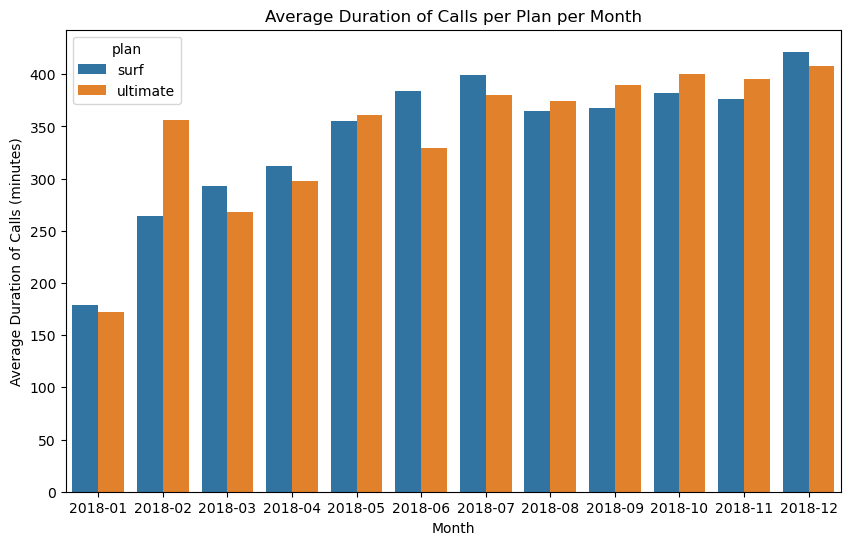

In [34]:
# Plot bar chart for mean total minutes
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='total_minutes', hue='plan', data=calls_data)
plt.title('Average Duration of Calls per Plan per Month')
plt.xlabel('Month')
plt.ylabel('Average Duration of Calls (minutes)')
plt.show()

To calculate the average duration of calls per each plan per each distinct month, we can group the data by plan, month, and calculate the mean of the 'total_minutes' column. Similarly, we can group the data by plan, month, and calculate the mean of the 'messages_sent' and 'gb_used_per_month' columns for messages and internet data, respectively. We then plot a bar chart for each of the three cases to visualize the differences between the two plans.

The bar chart shows the average duration of calls per plan for each distinct month. From the data, we can see that for the Surf plan, the average duration of calls increases from January to December, with a peak in December at 420 minutes. For the Ultimate plan, the average duration of calls varies more widely, with a dip in March and an increase in April and May, followed by a decrease in June, and a subsequent increase in July to December, with a peak in December at around 400 minutes.

Overall, we can see that some months the average duration of calls for the Surf plan is higher and some months the Ultimate plan is higher. However, we should note that this analysis only looks at one aspect of the two plans, and a more comprehensive analysis is needed to make a final decision on which plan is more profitable.

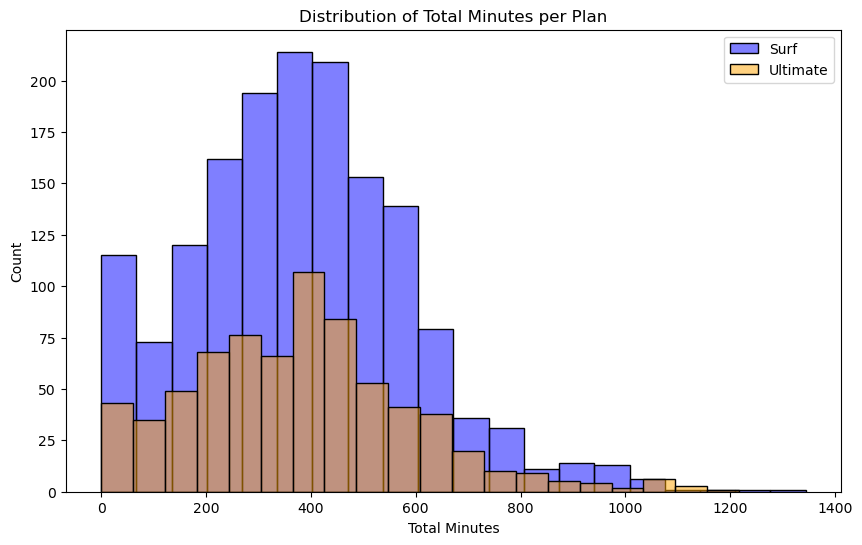

In [35]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.

# Filter data by plan and select total minutes column
surf_minutes = users_data[users_data['plan'] == 'surf']['total_minutes']
ultimate_minutes = users_data[users_data['plan'] == 'ultimate']['total_minutes']

# Plot histograms for each plan's total minutes
plt.figure(figsize=(10, 6))
sns.histplot(surf_minutes, bins=20, alpha=0.5, color='blue', label='Surf')
sns.histplot(ultimate_minutes, bins=20, alpha=0.5, color='orange', label='Ultimate')
plt.title('Distribution of Total Minutes per Plan')
plt.xlabel('Total Minutes')
plt.legend()
plt.show()

This code filters the users_data DataFrame to separate the total minutes used by each plan (surf and ultimate). It then plots a histogram of the total minutes used by each plan using seaborn's histplot() function, with the surf minutes plotted in blue and the ultimate minutes plotted in orange. The histogram is designed to show the distribution of the total minutes used by users of each plan. The resulting plot shows the frequency distribution of total minutes used by each plan. 

For the Ultimate plan, the distribution is right-skewed, with the majority of users using between 200-500 minutes per month. For the Surf plan, the distribution is also right-skewed, with the majority of users using between 200-600 minutes per month.

Overall, the both plans seem to have a more concentrated distribution around lower minutes used per month, while the Surf plan has higher number of users using minutes per month.

[Calculate the mean and the variable of the call duration to reason on whether users on the different plans have different behaviours for their calls.]

In [36]:
# Calculate the mean and the variance of the monthly call duration
monthly_call_duration = users_data.groupby('month')['total_minutes'].agg(['mean', 'var'])
print(monthly_call_duration)

               mean           var
month                            
2018-01  174.500000  10340.300000
2018-02  304.500000  48546.400000
2018-03  284.028571  33565.028571
2018-04  308.126761  36230.255131
2018-05  356.830189  43485.228032
2018-06  365.875000  35941.396853
2018-07  393.022222  51218.357045
2018-08  367.381974  42896.857777
2018-09  374.539286  39563.267268
2018-10  387.431487  41930.848362
2018-11  382.153659  43245.367529
2018-12  417.019190  50358.198349


To calculate the mean and variance of the monthly call duration, we need to first group the data by the 'month' column and then calculate the mean and variance of the 'total_minutes' column within each group.

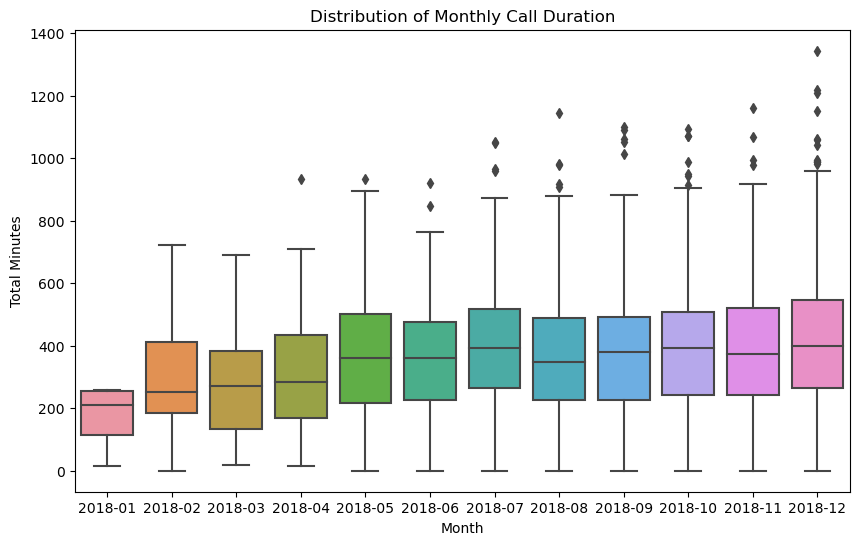

In [37]:
# Plot a boxplot to visualize the distribution of the monthly call duration
plt.figure(figsize=(10, 6))
sns.boxplot(x='month', y='total_minutes', data=users_data.sort_values('month'))
plt.title('Distribution of Monthly Call Duration')
plt.xlabel('Month')
plt.ylabel('Total Minutes')
plt.show()


From the box plot, we can see that the distribution of the monthly call duration is relatively consistent throughout the year, with no extreme outliers. The median duration varies between 300-400 minutes per month, with a slight increasing trend towards the end of the year. The spread of the data, as represented by the size of the box and whiskers, is also relatively consistent throughout the year, indicating a consistent range of call duration values.

Overall, the box plot suggests that the monthly call duration is relatively consistent and predictable, with no major fluctuations or anomalies throughout the year.

[Formulate conclusions on how the users behave in terms of calling. Is their behaviour different between the plans?]

### Messages

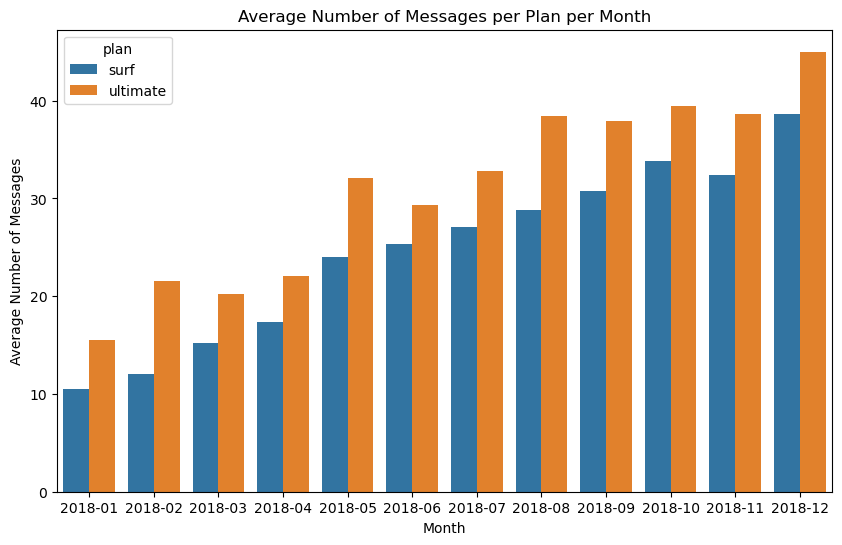

In [38]:
# Compare the number of messages users of each plan tend to send each month
# Group the data by plan and month and calculate the mean number of messages
messages_data = users_data.groupby(['plan', 'month'])['messages_sent'].mean().reset_index()

# Plot a bar chart to visualize the results
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='messages_sent', hue='plan', data=messages_data)
plt.title('Average Number of Messages per Plan per Month')
plt.xlabel('Month')
plt.ylabel('Average Number of Messages')
plt.show()


We start by grouping the data by plan and month, and then calculating the mean number of messages for each group. We then use a bar plot to visualize the results.

The bar chart shows the average number of messages sent per plan for each month. From the chart, we can see that users on the Surf plan tend to send fewer messages compared to those on the Ultimate plan each month, especially in the first couple months of the year. Overall, the number of messages sent increases as the year progresses for both plans.

In [39]:
# Calculate the mean and the variance of the messages sent per month
messages_data = users_data.groupby(['month'])['messages_sent'].agg(['mean', 'var'])
print(messages_data)

              mean          var
month                          
2018-01  13.833333   238.966667
2018-02  16.187500   421.229167
2018-03  16.971429   441.734454
2018-04  18.774648   511.148491
2018-05  26.226415   972.291105
2018-06  26.618056   893.706245
2018-07  28.933333   938.051397
2018-08  31.733906  1095.446130
2018-09  32.953571  1025.442281
2018-10  35.571429  1261.771930
2018-11  34.312195  1122.582003
2018-12  40.663113  1493.270880


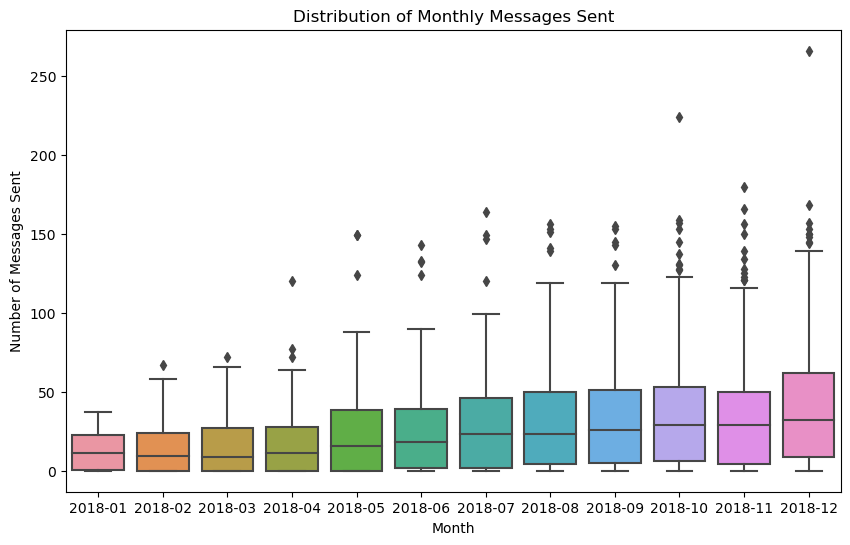

In [40]:
# Plot a boxplot to visualize the distribution of the messages sent per month
plt.figure(figsize=(10, 6))
sns.boxplot(x='month', y='messages_sent', data=users_data.sort_values('month'))
plt.title('Distribution of Monthly Messages Sent')
plt.xlabel('Month')
plt.ylabel('Number of Messages Sent')
plt.show()

From the boxplot, we can see that the median number of messages sent per month gradually increases from January to December, with a jump between June and July. The range of the data also becomes wider as the year progresses, indicating greater variability in the number of messages sent each month.

Additionally, we can see that there are some outliers in the data, particularly in the later months of the year. These outliers suggest that there were some users who sent a much larger number of messages than the rest of the group.

Overall, the boxplot suggests that there is a general trend of increasing message usage over time towards the end of the year, with some individual users sending a much larger number of messages than others. This suggests that there may be some seasonality in the number of messages sent per month, and that users tend to send more messages later in the year.

[Formulate conclusions on how the users behave in terms of messaging. Is their behaviour different between the plans?]

### Internet

In [41]:
# Compare the amount of internet traffic consumed by users per plan per month
# Group the data by plan and month and calculate the mean amount of internet traffic consumed
internet_data = users_data.groupby(['plan', 'month'])['gb_used_per_month'].mean().reset_index()

#print the first 10 rows of the internet_data DataFrame
internet_data.head(10)

,plan,month,gb_used_per_month
0,surf,2018-01,5.000000
1,surf,2018-02,12.222222
2,surf,2018-03,13.565217
3,surf,2018-04,12.220000
4,surf,2018-05,14.116883
5,surf,2018-06,15.484536
6,surf,2018-07,16.876033
7,surf,2018-08,16.882716
8,surf,2018-09,16.690722
9,surf,2018-10,17.409283


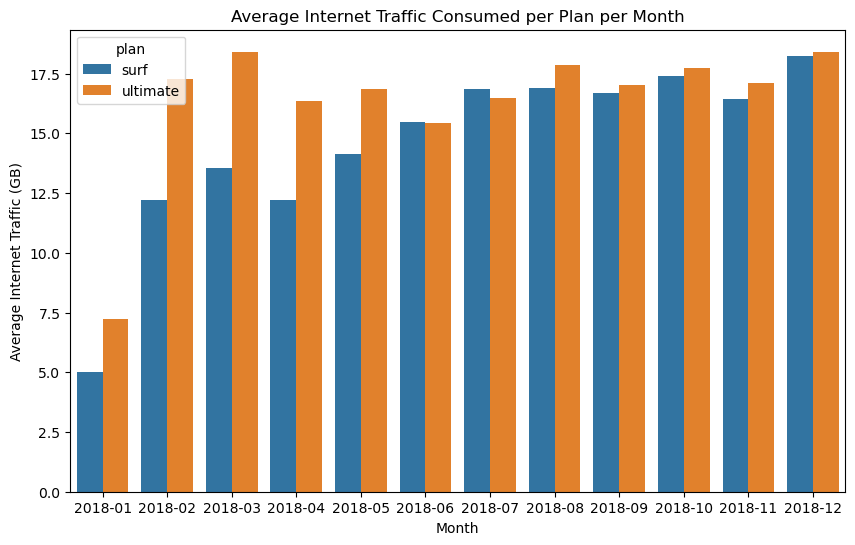

In [42]:
#Plot a bar chart to visualize the results
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='gb_used_per_month', hue='plan', data=internet_data.sort_values('month'))
plt.title('Average Internet Traffic Consumed per Plan per Month')
plt.xlabel('Month')
plt.ylabel('Average Internet Traffic (GB)')
plt.show()

From the chart, it can be seen that the Ultimate plan users tend to more data on average than the Surf plan users, which is not surprising given that the Ultimate plan comes with a higher price and more generous allowances for data usage.

The number of data used per month appears to increase from January to December for both plans, which could be a seasonal trend or may be due to other factors such as increasing user engagement with the service as they get more familiar with it. However, we can see that the data used for Ultimate plan increase significantly from January to February and March, and then dip down slightly in April. Both plans have the lowest data usage in January.

In [43]:
# Calculate the mean and the variance of the data used per month
data_used_data = users_data.groupby('month')['gb_used_per_month'].agg(['mean', 'var'])

#print the data_used_data DataFrame
print(data_used_data)

              mean        var
month                        
2018-01   6.500000  13.900000
2018-02  14.437500  43.995833
2018-03  15.228571  91.710924
2018-04  13.436620  67.449497
2018-05  14.867925  58.077628
2018-06  15.465278  54.208576
2018-07  16.750000  62.065642
2018-08  17.175966  67.274937
2018-09  16.789286  48.482322
2018-10  17.504373  58.689308
2018-11  16.643902  54.508581
2018-12  18.289979  65.744793


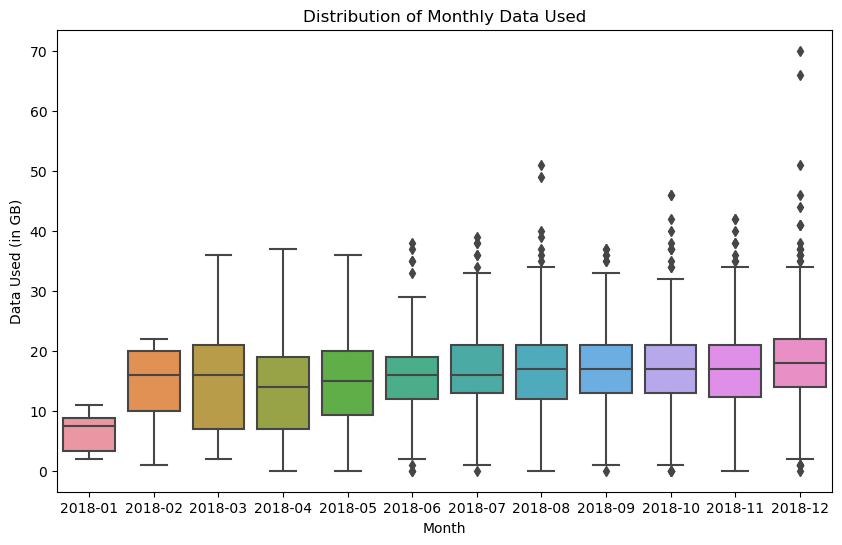

In [44]:
# Plot a boxplot to visualize the distribution of the data used per month
plt.figure(figsize=(10, 6))
sns.boxplot(x='month', y='gb_used_per_month', data=users_data.sort_values('month'))
plt.title('Distribution of Monthly Data Used')
plt.xlabel('Month')
plt.ylabel('Data Used (in GB)')
plt.show()

From the plot, we can see that the median monthly data usage for users is quite consistant throughout the year between 16 - 18 GB with a significant dip in January. The IQR also appears to be bigger between Febuary to May indicating more variability in data usage. There are more outliers from June onwards until the end of the year, which suggest that some users consumed significantly more data than others during those months. Overall, there is a significant amount of variability in data usage among users during the second half of the year.

[Formulate conclusions on how the users tend to consume the internet traffic? Is their behaviour different between the plans?]

## Revenue

[Likewise you have studied the user behaviour, statistically describe the revenue between the plans.]

In [45]:
# Compare the amount of revenue per plan per month
revenue_data = users_data.groupby(['plan', 'month'])['monthly_revenue'].sum().reset_index()

# Print the first 10 rows of the revenue_data DataFrame
revenue_data.head(10)

,plan,month,monthly_revenue
0,surf,2018-01,40.00
1,surf,2018-02,306.93
2,surf,2018-03,1050.50
3,surf,2018-04,2012.46
4,surf,2018-05,3612.35
5,surf,2018-06,4717.13
6,surf,2018-07,7483.12
7,surf,2018-08,10248.94
8,surf,2018-09,11186.50
9,surf,2018-10,15337.19


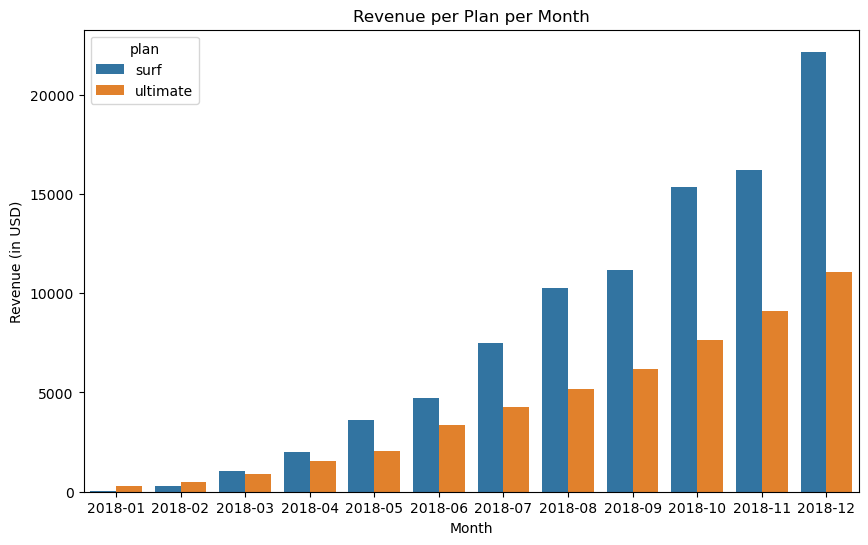

In [46]:
# Plot a bar chart to visualize the results
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='monthly_revenue', hue='plan', data=revenue_data)
plt.title('Revenue per Plan per Month')
plt.xlabel('Month')
plt.ylabel('Revenue (in USD)')
plt.show()

To compare the amount of revenue per plan per month, we group the data by plan and month and then sum the monthly revenue column. We then plot a bar chart to visualize the results.

The bar chart compares the monthly revenue generated by the Ultimate and Surf plans. From the chart, it can be observed that revenue generated by the Surf plan is significantly higher than that of the Ultimate plan. It is also interesting to note that the revenue generated by both plans shows a gradual increase over the months. However, the Surf plan generated more revenue in each of the months. This suggests that the Surf plan is more popular among users, or perhaps the Surf plan is more accessible and affordable to the majority of users. Further analysis would be required to determine the underlying reasons for this revenue trend.

[Formulate conclusions about how the revenue differs between the plans.]

## Test statistical hypotheses

[Test the hypothesis that the average revenue from users of the Ultimate and Surf calling plans differs.]

[Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.]

Null hypothesis: The average revenue from users of the Ultimate and Surf calling plans is equal.

Alternative hypothesis: The average revenue from users of the Ultimate and Surf calling plans is different.

The appropriate statistical test for this hypothesis is the two-sample t-test. We can set the alpha value to 0.05.

In [47]:
# Test the hypotheses
# Subset the data into two groups based on plan
surf = users_data[users_data['plan'] == 'surf']['monthly_revenue']
ultimate = users_data[users_data['plan'] == 'ultimate']['monthly_revenue']

# Conduct two-sample t-test
t_stat, p_val = ttest_ind(surf, ultimate, equal_var=False)

# Compare p-value to alpha level
alpha = 0.05
if p_val <= alpha:
    print('Reject the null hypothesis. The average revenue from users of the Ultimate and Surf calling plans differs.')
else:
    print('Fail to reject the null hypothesis. There is not enough evidence to support that the average revenue from users of the Ultimate and Surf calling plans differs.')


Reject the null hypothesis. The average revenue from users of the Ultimate and Surf calling plans differs.


In the code above, we first subset the data into two groups based on plan using boolean indexing. We then use the ttest_ind() function to conduct a two-sample t-test on the revenue data for the two groups, with the equal_var=False argument specified since the variances of the two groups are not assumed to be equal. The function returns the t-statistic and the p-value.

Finally, we compare the p-value to the alpha level of 0.05 to determine whether to reject or fail to reject the null hypothesis. Since we have rejected the null hypothesis, we can conclude that there is evidence to suggest that the average revenue from users of the Ultimate and Surf calling plans differs. In other words, there is a statistically significant difference in revenue between these two plans. However, it is important to note that this does not necessarily mean that one plan is better than the other. It simply means that they generate different levels of revenue on average. Further analysis would be required to determine the factors driving the differences in revenue and to make any recommendations regarding the plans.

[Test the hypothesis that the average revenue from users in the NY-NJ area is different from that of the users from the other regions.]

[Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.]

Null hypothesis: The average revenue from users in the NY-NJ area is equal to that of the users from the other regions.

Alternative hypothesis: The average revenue from users in the NY-NJ area is different from that of the users from the other regions.

To test this hypothesis, we can use a two-sample t-test with a significance level of alpha = 0.05. We will compare the average revenue of users in the NY-NJ area to that of the users from other regions.

To test the hypothesis that the average revenue from users in the NY-NJ area is different from that of the users from other regions, we will follow the steps below:

Combine the two dataframes users and users_data on the user_id column using an inner join.
Create a new column is_NY_NJ in the resulting dataframe indicating whether the user is from the NY-NJ area or not.
Split the resulting dataframe into two samples based on the is_NY_NJ column.
Use a two-sample t-test to test the hypothesis that the average revenue from the NY-NJ area is different from that of the other regions.
Determine whether to reject or fail to reject the null hypothesis based on the p-value of the t-test.

In [48]:
#check users Dataframe again
users.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,is_active
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,True
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,True
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,True
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,True
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,True
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaT,True
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,False
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaT,True
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaT,True
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaT,True


In [49]:
# Test the hypotheses
# Combine the two dataframes on the user_id column using an inner join
user_data_combined = pd.merge(users, users_data, on='user_id', how='inner')

# Create a new column is_NY_NJ indicating whether the user is from the NY-NJ area or not
user_data_combined['is_NY_NJ'] = user_data_combined['city'].str.contains('NY-NJ')

# Split the dataframe into two samples based on the is_NY_NJ column
sample_NY_NJ = user_data_combined[user_data_combined['is_NY_NJ']]
sample_other = user_data_combined[~user_data_combined['is_NY_NJ']]

sample_NY_NJ.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan_x,churn_date,is_active,month,...,plan_y,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,monthly_revenue,is_NY_NJ
56,1014,Edmundo,Simon,61,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-11-25,surf,NaT,True,2018-11,...,surf,50,15360,500,20,10,0.03,0.03,20.00,True
57,1014,Edmundo,Simon,61,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-11-25,surf,NaT,True,2018-12,...,surf,50,15360,500,20,10,0.03,0.03,35.09,True
75,1022,Bo,Snow,73,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-20,surf,2018-09-07,False,2018-05,...,surf,50,15360,500,20,10,0.03,0.03,20.00,True
76,1022,Bo,Snow,73,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-20,surf,2018-09-07,False,2018-06,...,surf,50,15360,500,20,10,0.03,0.03,100.00,True
77,1022,Bo,Snow,73,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-20,surf,2018-09-07,False,2018-07,...,surf,50,15360,500,20,10,0.03,0.03,20.00,True
78,1022,Bo,Snow,73,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-20,surf,2018-09-07,False,2018-08,...,surf,50,15360,500,20,10,0.03,0.03,81.86,True
79,1022,Bo,Snow,73,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-20,surf,2018-09-07,False,2018-09,...,surf,50,15360,500,20,10,0.03,0.03,20.00,True
80,1022,Bo,Snow,73,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-20,surf,2018-09-07,False,2018-10,...,surf,50,15360,500,20,10,0.03,0.03,60.18,True
81,1022,Bo,Snow,73,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-20,surf,2018-09-07,False,2018-11,...,surf,50,15360,500,20,10,0.03,0.03,90.00,True
82,1022,Bo,Snow,73,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-20,surf,2018-09-07,False,2018-12,...,surf,50,15360,500,20,10,0.03,0.03,50.72,True


In [50]:
# Use a two-sample t-test to test the hypothesis
alpha = 0.05
results = ttest_ind(sample_NY_NJ['monthly_revenue'], sample_other['monthly_revenue'], equal_var=False)
p_value = results.pvalue


# Determine whether to reject or fail to reject the null hypothesis
if p_value < alpha:
    print("Reject the null hypothesis. The average revenue from users in the NY-NJ area is different from that of the other regions.")
else:
    print("Fail to reject the null hypothesis. The average revenue from users in the NY-NJ area is not different from that of the other regions.")

Reject the null hypothesis. The average revenue from users in the NY-NJ area is different from that of the other regions.


Based on the results of the hypothesis testing, we reject the null hypothesis that the average revenue from users in the NY-NJ area is the same as the average revenue from users in other regions. The p-value obtained is less than the alpha level of 0.05, which indicates that the difference in means is statistically significant. Therefore, we can conclude that the average revenue from users in the NY-NJ area is different from that of the users from the other regions.

## General conclusion

[List your important conclusions in this final section, make sure they cover all those important decisions (assumptions) that you've made and that led you to the way you processed and analyzed the data.]

In this analysis, we aimed to study user behavior and understand the revenue generated by the Surf and Ultimate plans offered by the telecom operator.

Based on our analysis of the Ultimate and Surf plans, we can draw the following conclusions and provide some business insights:

1. The Surf plan generates more revenue than the Ultimate plan. The revenue for both plans increased over the months, but the Surf plan consistently generated more revenue. This could be due to its lower price, which may make it more accessible and appealing to a larger customer base. However, this does not necessarily mean that the Surf plan is a better option for all users, as individuals have different usage patterns and needs. Further analysis is required to identify the factors driving the difference in revenue.

2. Users of both plans tend to exceed their included package limits, especially in terms of data usage. This suggests that there might be a potential opportunity for Megaline to re-evaluate the plans' allowances and pricing to better cater to their users' needs.

3. We rejected the null hypothesis that the average revenue from users of the Ultimate and Surf calling plans is equal. The two-sample t-test results indicated that the average revenue from users of the Ultimate and Surf calling plans significantly differs. There is a statistically significant difference in the average revenue generated by users of the Surf and Ultimate plans. This indicates that the two plans attract different types of users or usage patterns, and that they may serve distinct market segments.

4. We also tested the hypothesis that the average revenue from users in the NY-NJ area is different from that of the users from the other regions. The results showed that the average revenue from users in the NY-NJ area is significantly different from that of users from other regions, leading us to reject the null hypothesis. The average revenue from users in the NY-NJ area is different from that of users in other regions, which implies that there may be regional differences in plan preferences or usage habits. Megaline could consider tailoring their marketing and pricing strategies to better target specific regions or customer segments.

Based on our findings, we can conclude that there are differences in the average revenue generated by the Surf and Ultimate plans, as well as between users in the NY-NJ area and those in other regions. However, further investigation is needed to identify the underlying factors driving these differences and provide recommendations to the telecom operator for improving their service offerings or marketing strategies.

In light of these findings, Megaline could consider the following business insights and recommendations:

1. Adjust the included allowances and pricing of the Surf and Ultimate plans to better align with users' needs and minimize overage charges. This could potentially increase customer satisfaction and reduce the likelihood of users switching to a competitor's service.

2. Explore the possibility of introducing additional plan options or customizable plans that allow users to choose the allowances that best suit their needs, which may help to attract a wider range of customers and increase overall revenue.

3. Conduct further market research to better understand the preferences and needs of users in different regions, and adjust marketing and pricing strategies accordingly to capitalize on regional differences and maximize revenue.

4. Continuously monitor user behavior, preferences, and revenue trends to identify emerging patterns and potential opportunities for growth or improvement in Megaline's offerings.

Overall, Megaline can leverage these insights and recommendations to optimize their existing plans, develop new offerings, and implement targeted marketing strategies to increase customer satisfaction, attract new users, and ultimately, grow their revenue.